62. Unique Paths

There is a robot on an m x n grid. The robot is initially located at the top-left corner (i.e., grid[0][0]). The robot tries to move to the bottom-right corner (i.e., grid[m - 1][n - 1]). The robot can only move either down or right at any point in time.

Given the two integers m and n, return the number of possible unique paths that the robot can take to reach the bottom-right corner.

The test cases are generated so that the answer will be less than or equal to 2 * 109.

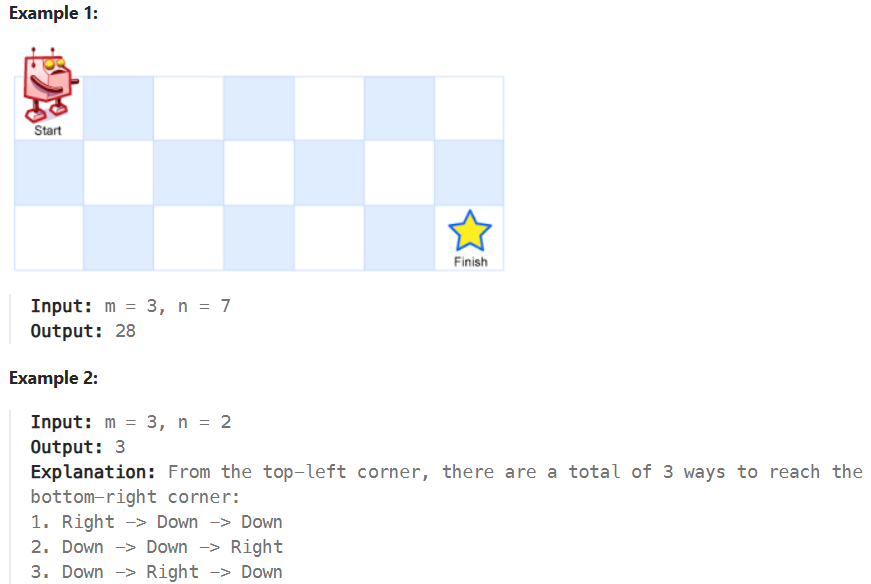

In [72]:
class Solution(object):
    def uniquePaths(self, m, n):
        dp = [[1] * n for _ in range(m)]

        for i in range(1,m):
            for j in range(1,n):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        
        return dp[-1][-1]


In [73]:
# Solution with generation of all possible ways, where robot can go everywhere: UP, LEFT, RIGHT, DOWN

import copy
import numpy as np

def possible_ways(map, curr_pos):
    result = []
    ways = [(-1,0, 'up'), (0, -1, 'left'), (1, 0, 'down'), (0, 1, 'right')]
    for way in ways:
        check_pos = (curr_pos[0] + way[0] ,curr_pos[1] + way[1])
        if  0 <= check_pos[0] < map.shape[0] and 0 <= check_pos[1] < map.shape[1]:
            if map[*check_pos] == 0:
                result.append((check_pos, way[-1]))
          
    # print(result)
    return result




def routes(map, dest_pos, curr_pos = (0,0), route = None, result_routes = []):
    if route is None:
        route = []

   
    new_map = copy.deepcopy(map)
    new_map[*curr_pos] = 1 # mark position as visited
    # print(new_map)


    if curr_pos == dest_pos:
        result_routes.append(route)
        # print('1')
        return
    
    for way, way_name in possible_ways(new_map, curr_pos):
        # print('2')
        new_route = [*route, way_name]
        routes(new_map, dest_pos, curr_pos = way, route = new_route)

    return result_routes


# input
m = 3
n = 2       

# create map
map = np.zeros((m,n), dtype = int)
dest_pos = (m -1, n -1)

res = routes(map, dest_pos, curr_pos = (0,0), route = None)
print(res)

[['down', 'down', 'right'], ['down', 'right', 'down'], ['right', 'down', 'left', 'down', 'right'], ['right', 'down', 'down']]


In [74]:
# Solution with generation of all possible ways, where robot can go  RIGHT, DOWN only

import copy
import numpy as np

def possible_ways(map, curr_pos):
    result = []
    ways = [ (1, 0, 'down'), (0, 1, 'right')]
    for way in ways:
        check_pos = (curr_pos[0] + way[0] ,curr_pos[1] + way[1])
        if  0 <= check_pos[0] < map.shape[0] and 0 <= check_pos[1] < map.shape[1]:
            if map[*check_pos] == 0:
                result.append((check_pos, way[-1]))
          
    # print(result)
    return result




def routes(map, dest_pos, curr_pos = (0,0), route = None, result_routes = []):
    if route is None:
        route = []

   
    new_map = copy.deepcopy(map)
    new_map[*curr_pos] = 1 # mark position as visited
    # print(new_map)


    if curr_pos == dest_pos:
        result_routes.append(route)
        # print('1')
        return
    
    for way, way_name in possible_ways(new_map, curr_pos):
        # print('2')
        new_route = [*route, way_name]
        routes(new_map, dest_pos, curr_pos = way, route = new_route)

    return result_routes


# input
m = 3
n = 2       

# create map
map = np.zeros((m,n), dtype = int)
dest_pos = (m -1, n -1)


res = routes(map, dest_pos, curr_pos = (0,0), route = None)
print(res)

[['down', 'down', 'right'], ['down', 'right', 'down'], ['right', 'down', 'down']]


In [75]:
# Solution of dynamic programming where robot can go  RIGHT, DOWN only
# Not generating the routes - just calculation of number ways to reach the destination

# input
m = 3
n = 2       

def routes(m, n):
    dp = [[1] * n for _ in range(m)]

    for i in range(1,m):
        for j in range(1,n):
            dp[i][j] = dp[i-1][j] + dp[i][j-1]
    
    return dp[-1][-1]


routes(m, n)

3